In [ ]:
%%capture
!pip install tensorflow
!pip install librosa
!pip install pydub

In [38]:
import random
import librosa

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from pydub import AudioSegment
import numpy as np
import os
import zipfile
def unzip_in_place(zip_path: str):
    if not zipfile.is_zipfile(zip_path):
        raise ValueError("Provided file is not a valid zip archive")

    extract_dir = os.path.dirname(zip_path)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    print(f"Unzipped '{zip_path}' to '{extract_dir}'")

unzip_in_place('/content/drive/MyDrive/dataset-20250315T134137Z-001.zip')

Unzipped '/content/drive/MyDrive/dataset-20250315T134137Z-001.zip' to '/content/drive/MyDrive'


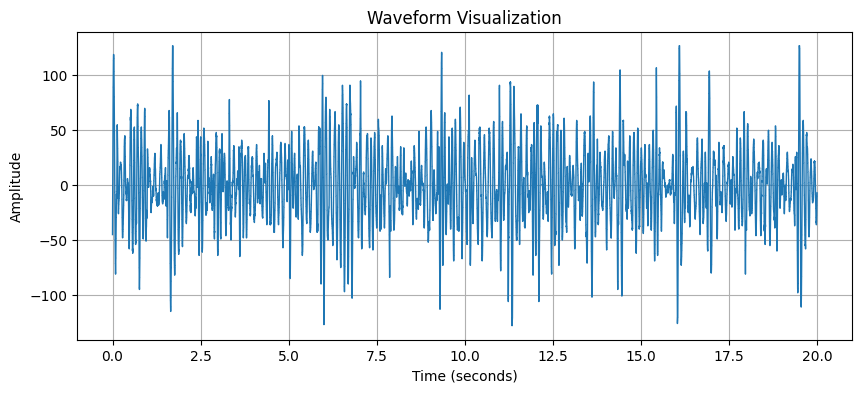

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

def plot_waveform(waveform, sample_rate: int = 8000):
    """
    Plots a waveform from a 1D NumPy array.

    Parameters:
    waveform (np.ndarray): The 1D array representing the sound wave.
    sample_rate (int): The sample rate of the audio (default is 44100 Hz).
    """

    waveform = get_np_array(waveform)

    time_axis = np.linspace(0, len(waveform) / sample_rate, num=len(waveform))

    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, waveform, linewidth=1)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("Waveform Visualization")
    plt.grid(True)
    plt.show()

def get_np_array(waveform: AudioSegment):
  return np.array(waveform.get_array_of_samples())

# Example usage:
file_path = os.path.join("/content/drive/MyDrive/dataset/asthma/asthma_1.wav")
waveform = AudioSegment.from_file(file_path)
plot_waveform(waveform)


In [9]:
from tf_keras import Model
from tf_keras.layers import Input, Conv2D, ReLU, BatchNormalization, Flatten, \
  Dense, Reshape, Conv2DTranspose, Activation, Dropout, LeakyReLU, LayerNormalization, \
  Conv1DTranspose, Conv1D, Lambda, Concatenate, UpSampling1D, MaxPooling1D, GlobalAveragePooling1D
from tf_keras.initializers import HeNormal
from tf_keras.activations import sigmoid
from tf_keras.optimizers import Adam
from tf_keras.losses import MeanSquaredError, MeanAbsoluteError
from tf_keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, \
  Callback
from tf_keras.regularizers import l2
from tf_keras import backend as K
from tf_keras.models import Model
import tensorflow as tf
import numpy as np

def build_autoencoder(input_shape=(8000, 2), latent_dim=64):
  encoder_input = Input(shape=input_shape, name="Encoder_Input")

  x = Conv1D(8, 2, padding="same", activation=None)(encoder_input)
  x = LeakyReLU()(x)
  x = Dropout(0.1)(x)

  x = MaxPooling1D(2, padding="same")(x)
  x = Conv1D(8, 3, padding="same", activation=None)(x)
  x = LeakyReLU()(x)
  x = Dropout(0.1)(x)

  x = MaxPooling1D(2, padding="same")(x)
  x = Conv1D(4, 6, padding="same", activation=None)(x)
  x = LeakyReLU()(x)
  x = Dropout(0.1)(x)

  x = MaxPooling1D(2, padding="same")(x)
  x = Conv1D(2, 12, padding="same", activation=None)(x)
  x = LeakyReLU()(x)
  x = Dropout(0.1)(x)

  x = MaxPooling1D(2, padding="same")(x)
  x = Conv1D(1, 25, padding="same", activation=None)(x)
  x = LeakyReLU()(x)
  x = Dropout(0.1)(x)

  x = MaxPooling1D(2, padding="same")(x)
  x = Conv1D(1, 51, padding="same", activation=None)(x)
  x = LeakyReLU()(x)
  x = Dropout(0.1)(x)

  x = MaxPooling1D(2, padding="same")(x)
  x = Conv1D(2, 100, padding="same", activation=None)(x)
  x = LeakyReLU()(x)
  x = Dropout(0.1)(x)

  x = MaxPooling1D(2, padding="same")(x)
  x = Conv1D(4, 200, padding="same", activation=None)(x)
  x = LeakyReLU()(x)
  x = Dropout(0.1)(x)

  x = GlobalAveragePooling1D()(x)
  x = Dense(latent_dim, name="Dense1")(x)
  x = Dense(latent_dim, name="Dense2")(x)
  x = Dense(latent_dim, name="Dense3")(x)
  output = Dense(8, activation="softmax", name="Encoder_Output")(x)


  encoder = Model(encoder_input, output, name="Encoder")


  return encoder

encoder = build_autoencoder()

In [10]:
def load_sound(file_path):
  sounds = []
  for file in os.listdir(file_path):
    if file.endswith(".wav"):
      file_name = os.path.join(file_path, file)
      sounds.append(AudioSegment.from_file(file_name))
  return sounds

In [11]:
urti = load_sound("/content/drive/MyDrive/dataset/urti")
pneumonia = load_sound("/content/drive/MyDrive/dataset/pneumonia")
nop = load_sound("/content/drive/MyDrive/dataset/no potential disease detected")
lrti = load_sound("/content/drive/MyDrive/dataset/lrti")
copd = load_sound("/content/drive/MyDrive/dataset/copd")
bronchiolitis = load_sound("/content/drive/MyDrive/dataset/bronchiolitis")
bronchiectasis = load_sound("/content/drive/MyDrive/dataset/bronchiectasis")
asthma = load_sound("/content/drive/MyDrive/dataset/asthma")

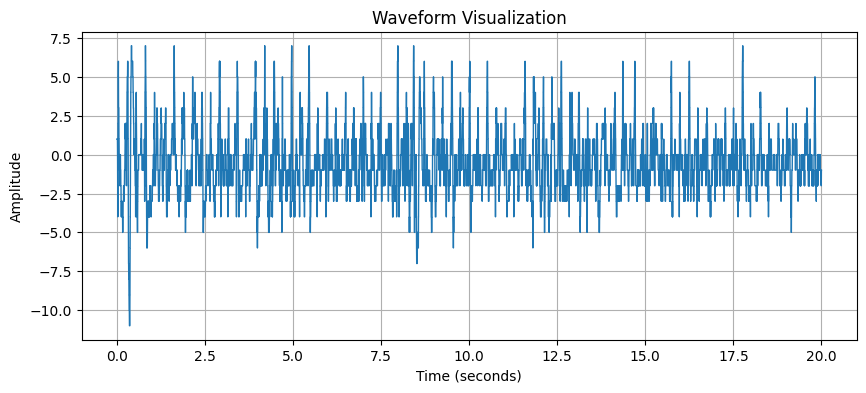

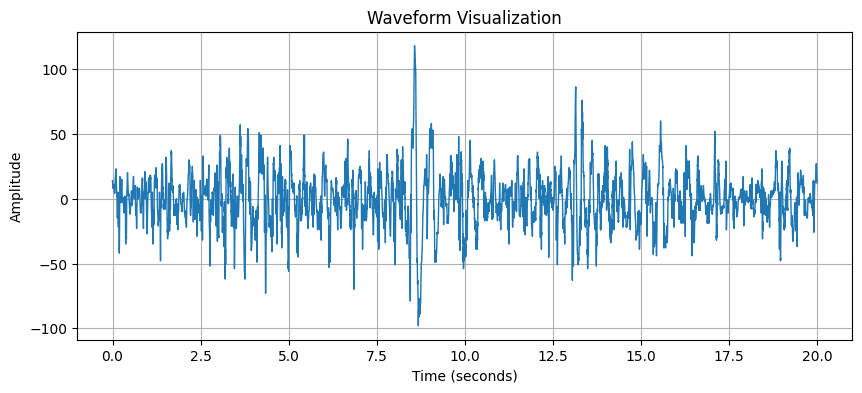

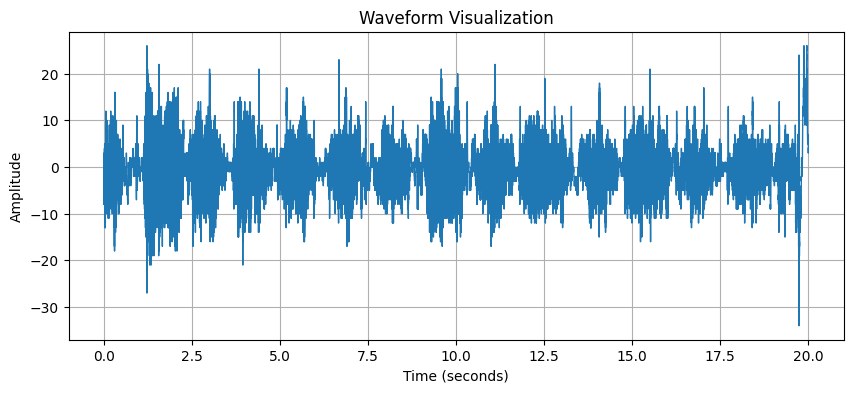

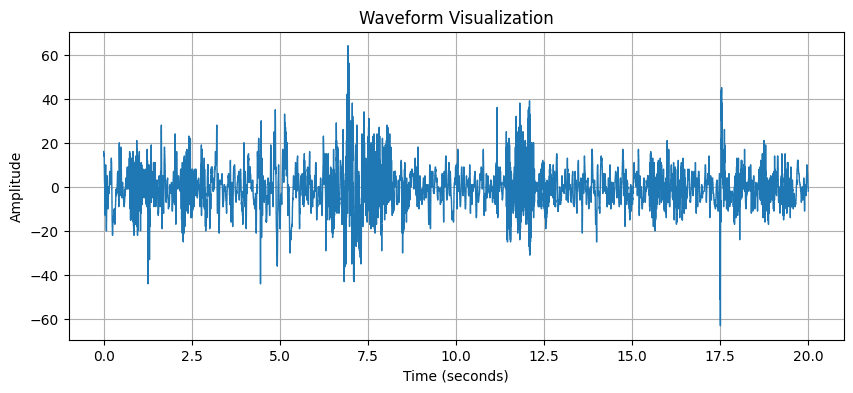

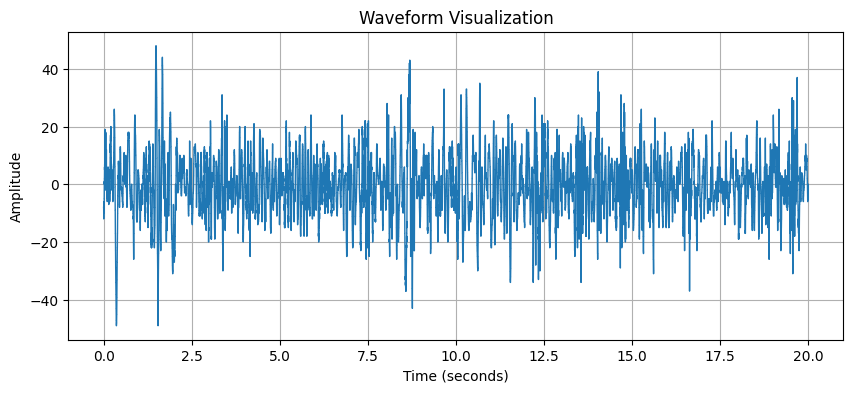

In [12]:
for sound in urti[:5]:
  plot_waveform(sound)

[]
([<pydub.audio_segment.AudioSegment object at 0x7bb4fa7a3f90>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef44fc90>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef3848d0>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef3855d0>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef3847d0>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef3869d0>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef384290>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef386b90>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef385090>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef386090>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef386250>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef386ad0>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef384350>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef386e10>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef386d50>, <pydub.audio_segment.AudioSegment object at 0x7bb4ef386e90>, <pydub.audio_segmen

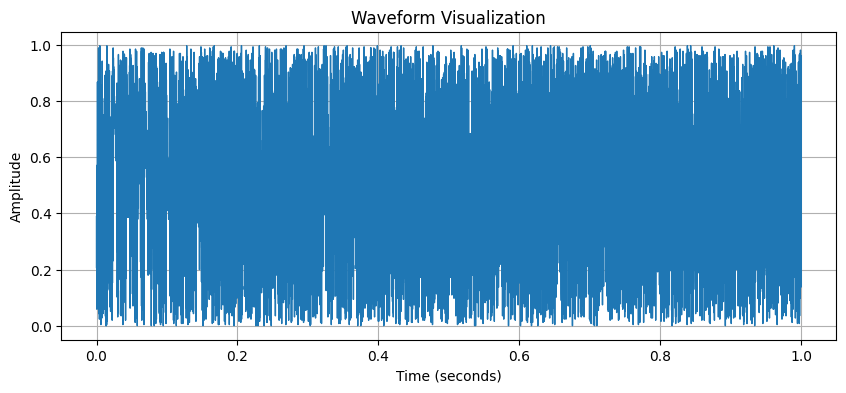

In [51]:
def test_data(sounds):
  """Generate new training data by randomly assembling sounds"""
  data = []
  for i in range(3):
    print(data)
    print(sounds)
    # evenly split chance for any type of disease

    for category in sounds:
      print(category)
      selected = random.choice(category)

      split = split_sound(selected, 1.0)

      for s in split:
        samples = np.array(s.get_array_of_samples(), dtype=np.float32)
        samples /= np.max(np.abs(samples))
        samples = (samples + 1) / 2
        data.append(samples)

  return np.array(data)

def augument_sound(sound):
  r_pitch = random.randint(-2, 2)
  samples = np.array(sound.get_array_of_samples(), dtype=np.float32)
  samples /= np.max(np.abs(samples))
  shifted = librosa.effects.pitch_shift(samples, sr=8000, n_steps=r_pitch)
  shifted = np.int16(shifted * 32767)
  audio_segment = AudioSegment(
        shifted.tobytes(),
        frame_rate=8000,
        sample_width=1,
        channels=1)
  return audio_segment

def split_sound(sound, length):
  split = []
  nr_splits = len(sound) / length / 1000
  #print(nr_splits)
  for i in range(int(nr_splits - 1) * 2):
    if i != 0:
      start_pos = (i / 2) * 1000
    else:
      start_pos = i
    start_pos = int(start_pos)
    end_pos = start_pos + 1000
    print(start_pos)
    print(end_pos)
    s = sound[start_pos:end_pos]
    s = augument_sound(s)
    s = s.remove_dc_offset().normalize(0)
    split.append(s)
  return split

r = test_data((urti, urti))
print(r)
plot_waveform_np(r[0])

In [ ]:
x = test_data(cymbal, transient, body, (fund_kick, fund_snare))

for i in x[:10]:
  print(i)

2
5
2
2
4
5
1
3
3
1
[0.5014038  0.5002136  0.49067688 ... 0.5089874  0.5086975  0.508255  ]
[0.48754844 0.4807886  0.4868618  ... 0.7351146  0.7389904  0.73816645]
[0.49607837 0.4947661  0.4961089  ... 0.497116   0.49977112 0.49862668]
[0.5019226  0.50149536 0.49577332 ... 0.48823547 0.4881897  0.48954773]
[0.52127075 0.50276184 0.51760864 ... 0.9953613  0.9953613  0.9953613 ]
[0.4951477  0.49856567 0.50315857 ... 0.03218079 0.03215027 0.03279114]
[0.49861145 0.50161743 0.49835205 ... 0.503479   0.49783325 0.50424194]
[0.5034027  0.50572205 0.50556946 ... 0.5067444  0.51760864 0.5044098 ]
[0.5072479  0.49526978 0.4988861  ... 0.49876404 0.500412   0.5028229 ]
[0.4981842  0.50346375 0.49986267 ... 0.88827515 0.2998352  0.43486023]


In [ ]:
import tensorflow as tf
from tf_keras.callbacks import Callback
import numpy as np
import random
import librosa

class AudioGeneratorCallback(Callback):
  def __init__(self, fund, trans, body, cymbal, batch_size, num_samples):
    super().__init__()
    self.fund = fund
    self.trans = trans
    self.body = body
    self.cymbal = cymbal
    self.batch_size = batch_size
    self.num_samples = num_samples

  def generate_new_data(self):
    data = []
    for i in range(self.num_samples):
      sound = AudioSegment.silent(duration=200)

      ## 1/5 chance cymbal
      ## 2/5 chance kick
      ## 2/5 chance snare
      diceroll = random.randint(1, 5)

      ## CASE 1: WE HAVE A CYMBAL
      if diceroll == 1:
        sound = sound.overlay(augument_sound(self.cymbal))
        if random.randint(1, 2) == 2:
          sound = sound.overlay(augument_sound(self.cymbal))

      ## CASE 2: WE DONT HAVE A CYMBAL
      else:
        sound = sound.overlay(augument_sound(self.trans))
        sound = sound.overlay(augument_sound(self.body))

        ## CASE 2.1: WE HAVE A KICK
        if diceroll >= 4:
          sound = sound.overlay(augument_sound(self.fund[0]))

        ## CASE 2.2: WE HAVE A SNARE
        else:
          sound = sound.overlay(augument_sound(self.fund[1]))

      sound = sound.remove_dc_offset().normalize(0)[:200]
      samples = np.array(sound.get_array_of_samples(), dtype=np.float32)
      samples /= np.max(np.abs(samples))
      samples = (samples + 1) / 2
      data.append(samples)

    return np.array(data)

  def augument_sound(sounds):
    r_pitch = random.randint(-12, 12)
    sound = random.choice(sounds)
    samples = np.array(sound.get_array_of_samples(), dtype=np.float32)
    samples /= np.max(np.abs(samples))
    shifted = librosa.effects.pitch_shift(samples, sr=sound.frame_rate, n_steps=r_pitch)
    shifted = np.int16(shifted * 32767)
    audio_segment = AudioSegment(
          shifted.tobytes(),
          frame_rate=sound.frame_rate,
          sample_width=2,
          channels=1)
    return audio_segment + random.uniform(-12.0, 12.0)

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Generating new training data for epoch {epoch + 1}")
    new_data = self.generate_new_data()
    new_labels = new_data  # Autoencoder uses input as output
    self.model.fit(new_data, new_labels, batch_size=self.batch_size, epochs=1, verbose=0)

batch_size = 16
num_samples = 600

audio_generator_callback = AudioGeneratorCallback((fund_kick, fund_snare), transient, body, cymbal, batch_size, num_samples)

x_train = audio_generator_callback.generate_new_data()

Model: "Autoencoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Autoencoder_Input (InputLa  [(None, 3200, 1)]            0         []                            
 yer)                                                                                             
                                                                                                  
 Encoder (Functional)        [(None, 64),                 4864      ['Autoencoder_Input[0][0]']   
                              (None, 3200, 8),                                                    
                              (None, 1600, 8),                                                    
                              (None, 800, 8)]                                                     
                                                                                        

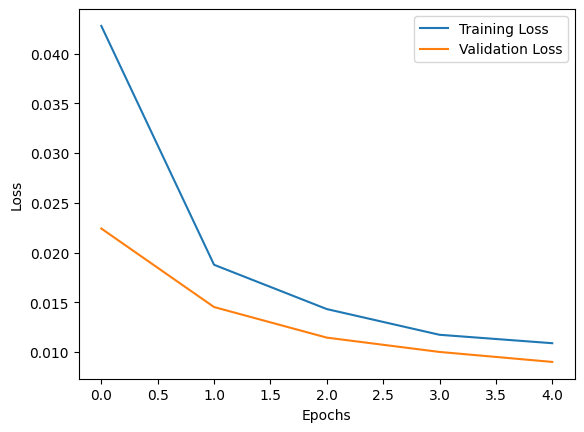

In [ ]:
import matplotlib.pyplot as plt

# notes: lr 0.0008, batch size 16, 5 epochs for 3000 samples (300 test), 1% noise

LEARNING_RATE = 0.0008
BATCH_SIZE = 16
EPOCHS = 5

def plot_history(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.plot(train_loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def train(model, x_train, learning_rate, batch_size, epochs, verbose=True):
  model.compile(optimizer=Adam(learning_rate=learning_rate), loss="mse")

  if verbose:
    model.summary()

  history = model.fit(x_train, x_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[audio_generator_callback])
  plot_history(history)

  return autoencoder

autoencoder = train(autoencoder, x_train, LEARNING_RATE, BATCH_SIZE, EPOCHS)
autoencoder.save(model_save_dir)

In [31]:
import os
import pickle
import matplotlib
import tensorflow
from tf_keras.models import load_model
import matplotlib.pyplot as plt

def plot_waveform_np(waveform, sample_rate: int = 16000):
    """
    Plots a waveform from a 1D NumPy array.

    Parameters:
    waveform (np.ndarray): The 1D array representing the sound wave.
    sample_rate (int): The sample rate of the audio (default is 44100 Hz).
    """

    time_axis = np.linspace(0, len(waveform) / sample_rate, num=len(waveform))

    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, waveform, linewidth=1)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("Waveform Visualization")
    plt.grid(True)
    plt.show()

def encode_decode_audio(autoencoder, x_data):
    #encoded = encoder.predict(x_data)
    decoded = autoencoder.predict(x_data)
    return decoded

#autoencoder = Autoencoder.load(MODEL_SAVE_DIR)

num_sample_images_to_show = 10
#sample = x_train[:num_sample_images_to_show]


'''print(sample.shape)

decoded = encode_decode_audio(autoencoder, sample)
decoded = decoded.astype("float32") / 255
print(decoded.shape)
for i in range(num_sample_images_to_show):
  plot_waveform_np(sample[i].squeeze())
  plot_waveform_np(decoded[i].squeeze())

#num_sample_images_to_show = 3000
#sample_images = x_train[:num_sample_images_to_show]
#_, latent_representations = autoencoder.reconstruct(sample_images)
#plot_images_encoded_in_latent_space(latent_representations)'''

'print(sample.shape)\n\ndecoded = encode_decode_audio(autoencoder, sample)\ndecoded = decoded.astype("float32") / 255\nprint(decoded.shape)\nfor i in range(num_sample_images_to_show):\n  plot_waveform_np(sample[i].squeeze())\n  plot_waveform_np(decoded[i].squeeze())\n\n#num_sample_images_to_show = 3000\n#sample_images = x_train[:num_sample_images_to_show]\n#_, latent_representations = autoencoder.reconstruct(sample_images)\n#plot_images_encoded_in_latent_space(latent_representations)'

In [ ]:
sound = AudioSegment.from_file("amen.wav")
data = []

print(sound.duration_seconds)

sounds = sound.remove_dc_offset().normalize(0)[::200]
for s in sounds:
  if s.duration_seconds == 0.2:
    s = s.set_frame_rate(16000).set_sample_width(2).set_channels(1)
    samples = np.array(s.get_array_of_samples(), dtype=np.float32)
    samples /= np.max(np.abs(samples))
    samples = (samples + 1) / 2
    data.append(samples)

data = np.array(data)

print(data.shape)

amen_decoded = encode_decode_audio(autoencoder, data)
#for i in decoded:
#  plot_waveform_np(i.squeeze())

def save_as_wav(waveform: np.ndarray, nr, file_path: str, original_min, original_max, sample_rate: int = 16000, normalize=True):
  """
  Saves a 1D NumPy array as a WAV file using librosa.

  Parameters:
  waveform (np.ndarray): The 1D array representing the sound wave.
  file_path (str): The path to save the WAV file.
  sample_rate (int): The sample rate of the audio (default is 22050 Hz).
  """
  waveform = waveform * 2 - 1
  waveform = np.int16(waveform * 32767)
  audio_segment = AudioSegment(
          waveform.tobytes(),
          frame_rate=sound.frame_rate,
          sample_width=2,
          channels=1)
  audio_segment.remove_dc_offset().normalize()

  audio_segment.export("/content/drive/MyDrive/WE <3 SOPHIE: Datasets/v2/model/0/amen/" + file_path + str(nr) + ".wav", format="wav")
  print("Saved to: " + file_path + str(nr) + ".wav")

for i, wave in enumerate(amen_decoded):
  save_as_wav(wave, i, "amen", 0, 1)
  save_as_wav(data[i], i, "amen" + "original", 0, 1, 16000, False)

6.986666666666666
(34, 3200)
2/2 [==============================] - 0s 33ms/step
Saved to: amen0.wav
Saved to: amenoriginal0.wav
Saved to: amen1.wav
Saved to: amenoriginal1.wav
Saved to: amen2.wav
Saved to: amenoriginal2.wav
Saved to: amen3.wav
Saved to: amenoriginal3.wav
Saved to: amen4.wav
Saved to: amenoriginal4.wav
Saved to: amen5.wav
Saved to: amenoriginal5.wav
Saved to: amen6.wav
Saved to: amenoriginal6.wav
Saved to: amen7.wav
Saved to: amenoriginal7.wav
Saved to: amen8.wav
Saved to: amenoriginal8.wav
Saved to: amen9.wav
Saved to: amenoriginal9.wav
Saved to: amen10.wav
Saved to: amenoriginal10.wav
Saved to: amen11.wav
Saved to: amenoriginal11.wav
Saved to: amen12.wav
Saved to: amenoriginal12.wav
Saved to: amen13.wav
Saved to: amenoriginal13.wav
Saved to: amen14.wav
Saved to: amenoriginal14.wav
Saved to: amen15.wav
Saved to: amenoriginal15.wav
Saved to: amen16.wav
Saved to: amenoriginal16.wav
Saved to: amen17.wav
Saved to: amenoriginal17.wav
Saved to: amen18.wav
Saved to: amenorig